In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

movies = pd.read_csv("zippedData/movies-genre-onehot.csv")
movies.drop(columns=[movies.columns[0]], inplace=True)
genres = ['Action',
 'Adventure',
 'Fantasy',
 'Sci-Fi',
 'Mystery',
 'Thriller',
 'Comedy',
 'Horror',
 'Drama',
 'Romance',
 'Music',
 'Musical',
 'Sport',
 'Animation',
 'War',
 'Biography',
 'Crime',
 'Family',
 'Western',
 'Documentary',
 'History',
 'Film-Noir',
 'Short',
 'Adult',
 'News',
 'Talk-Show',
 'Reality-TV']

In [2]:
movies#.info()

,title,domestic,international,worldwide,budget,year,reference,Action,Adventure,Fantasy,...,Family,Western,Documentary,History,Film-Noir,Short,Adult,News,Talk-Show,Reality-TV
0,Star Wars: Episode IV - A New Hope,307263857,195751992,503015849,11000000.0,1977,/release/rl2759034369/?ref_=bo_yld_table_1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,The Deep,47346365,0,47346365,NaN,1977,/release/rl3561784833/?ref_=bo_yld_table_2,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,The Spy Who Loved Me,46838673,0,46838673,NaN,1977,/release/rl2004059649/?ref_=bo_yld_table_3,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,"Oh, God!",41687243,0,41687243,NaN,1977,/release/rl2137425409/?ref_=bo_yld_table_4,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Exorcist II: The Heretic,30749142,0,30749142,NaN,1977,/release/rl1582335489/?ref_=bo_yld_table_5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19657,I Do Not Care If We Go Down in History as Barb...,11307,27864,39171,NaN,2020,/release/rl3876095489/?ref_=bo_yld_table_302,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19658,The Load,28410,0,28410,NaN,2020,/release/rl1460372993/?ref_=bo_yld_table_303,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19659,Asako I & II,25559,601543,627102,NaN,2020,/release/rl1359513089/?ref_=bo_yld_table_304,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19660,Chained for Life,17431,0,17431,NaN,2020,/release/rl1292600833/?ref_=bo_yld_table_305,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
movies.corr()
"""corr_di = {genre:movies.corr()["domestic"][genre] for genre in genres}
print(corr_di)
corr_df = pd.DataFrame.from_dict(corr_di)
print(corr_df)
print(np.mean(list(corr_di.values())))
maxcorr = max(list(corr_di.values()))

#print(movies.corr()["domestic"]["Fantasy"])
#print(movies.corr()["international"]["Fantasy"])"""
dom_row = movies.corr()["domestic"][[genre for genre in genres]]
dom_row[dom_row.max() == dom_row]

Adventure    0.335359
Name: domestic, dtype: float64

In [4]:
budget_df = movies[~np.isnan(movies["budget"])].copy()
budget_df["profit"] = budget_df["worldwide"] - budget_df["budget"]

In [35]:
display(budget_df[budget_df["year"]==1980]["Comedy"])
budget_df[budget_df["year"]==1981]["Comedy"]

62     0
73     0
90     0
98     1
118    0
Name: Comedy, dtype: int64

130    0
143    0
164    0
Name: Comedy, dtype: int64

In [6]:
corr_df = budget_df.corr()[["domestic","worldwide","international"]].loc[genres]
corr_df = corr_df[~np.isnan(corr_df["domestic"])]
corr_df.sort_values("domestic",ascending=False,inplace=True)

<BarContainer object of 23 artists>

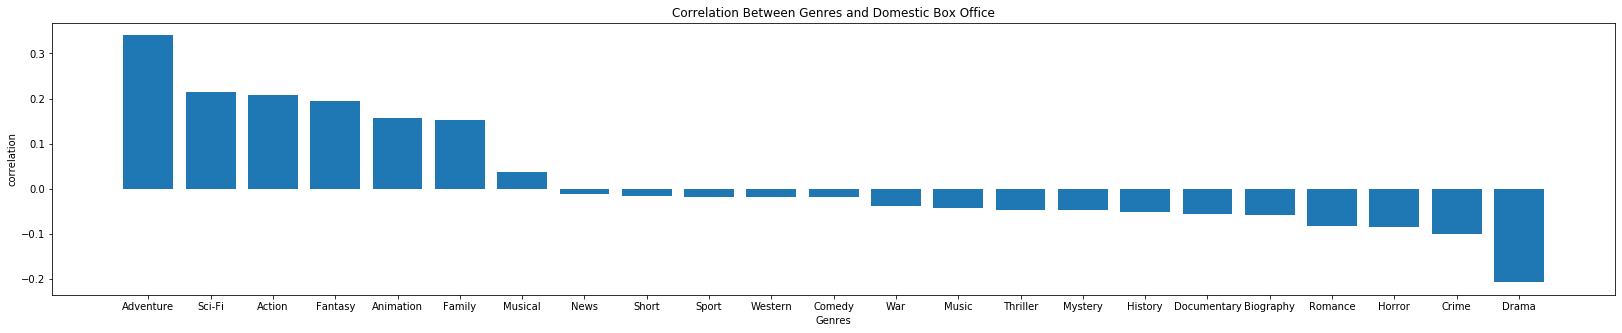

In [7]:
fig, ax = plt.subplots(figsize=(28,5))
#plt.figure(figsize=(25,5))
ax.set_title("Correlation Between Genres and Domestic Box Office")
ax.set_xlabel("Genres")
ax.set_ylabel("correlation")
ax.bar(corr_df.index,corr_df["domestic"])

<BarContainer object of 23 artists>

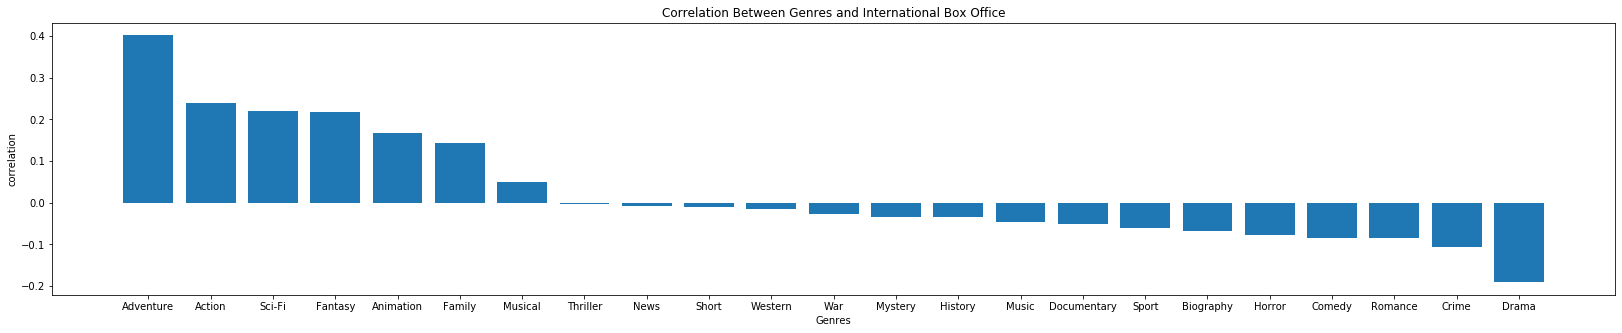

In [8]:
corr_df.sort_values("international",ascending=False,inplace=True)
fig, ax = plt.subplots(figsize=(28,5))
#plt.figure(figsize=(25,5))
ax.set_title("Correlation Between Genres and International Box Office")
ax.set_xlabel("Genres")
ax.set_ylabel("correlation")
ax.bar(corr_df.index,corr_df["international"])

In [47]:
comedy_df = budget_df[budget_df["Comedy"] == 1].copy()
comedy_corr = comedy_df.groupby(["year"])[["budget","profit"]].corr().iloc[0::2,-1]#.corr()#[["profit"]]
#comedy_corr = comedy_df.corr()[["budget","profit"]]
comedy_corr = comedy_corr.dropna()#inplace=True)
comedy_corr.index = [index[0] for index in comedy_corr.index]


,year,corr
year,1.000000,0.042332
corr,0.042332,1.000000


In [58]:
comedy_count = comedy_df.groupby(["year"]).count()["title"]
robust_corr = comedy_corr[comedy_count>=43]
robust_corr

1998    0.162838
1999    0.170104
2000    0.320453
2001    0.376869
2002    0.381478
2003    0.311415
2004    0.415975
2005    0.323336
2006    0.209400
2007    0.276028
2008    0.261926
2009    0.320030
2010    0.537269
2011    0.471900
2012    0.369788
2013    0.356322
2014    0.632829
2015    0.600351
2016    0.260319
2017    0.408182
2018    0.495889
2019    0.629695
Name: profit, dtype: float64

In [70]:
corr2 = pd.DataFrame({'year':robust_corr.index, 'budget profit corr':robust_corr.values})
corr2.corr()

,year,budget profit corr
year,1.000000,0.640469
budget profit corr,0.640469,1.000000


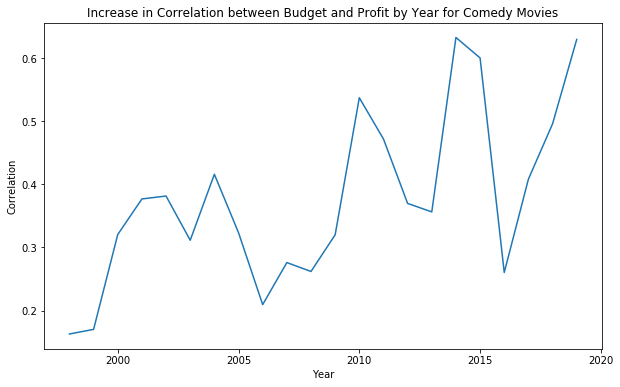

In [69]:
fig, ax = plt.subplots(figsize=(10,6))
#plt.figure(figsize=(25,5))
ax.set_title("Increase in Correlation between Budget and Profit by Year for Comedy Movies")
ax.set_xlabel("Year")
ax.set_ylabel("Correlation")
ax.plot(robust_corr.index,robust_corr)
plt.savefig("figures/comedy-corr.png")

In [80]:
print(budget_df.corr()["budget"]["profit"])
year_corr = budget_df.groupby("year")[["budget","profit"]].corr().iloc[0::2,-1]
year_corr.dropna()
year_corr.index = [index[0] for index in year_corr.index]
year_count = budget_df.groupby(["year"]).count()["title"]
year_corr = year_corr[year_count>=43]
year_corr

0.5257616122799778


1991    0.312078
1994    0.212972
1995    0.219868
1996    0.503053
1997    0.546553
1998    0.507234
1999    0.226077
2000    0.386319
2001    0.411087
2002    0.461606
2003    0.431500
2004    0.481133
2005    0.502940
2006    0.538094
2007    0.622854
2008    0.547728
2009    0.532000
2010    0.505430
2011    0.553679
2012    0.517601
2013    0.535491
2014    0.672148
2015    0.680694
2016    0.615573
2017    0.556155
2018    0.556994
2019    0.672665
2020    0.386753
Name: profit, dtype: float64

In [82]:
year_corr2 = pd.DataFrame({'year':year_corr.index, 'budget profit corr':year_corr.values})
year_corr2.corr()

,year,budget profit corr
year,1.000000,0.671614
budget profit corr,0.671614,1.000000


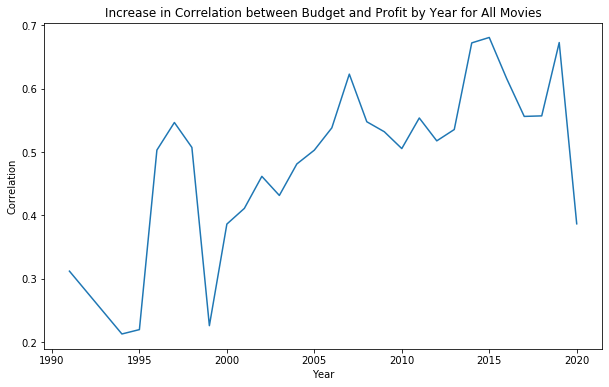

In [83]:
fig, ax = plt.subplots(figsize=(10,6))
#plt.figure(figsize=(25,5))
ax.set_title("Increase in Correlation between Budget and Profit by Year for All Movies")
ax.set_xlabel("Year")
ax.set_ylabel("Correlation")
ax.plot(year_corr.index,year_corr)